I will be exploring two datasets for bias: Adult dataset and Student Performance dataset.

Adult dataset:
Starting with the adult dataset, I wanted to practice downloading the data manually rather than using the import from the ucimlrepo. I manually set the column names, categorical and numerical variables using the information from the website.

A lot of the features are self explanatory. Here are some of the definitons of the variables that are not so explicit.

fnlwgt: This stands for "final weight", since the census actually represents the entire population. This value is supossed to represent how many individuals the census thinks this person represents.

capital-gain: capital gains for an individual.

capital-loss: capital loss for an individual.

In [115]:
%matplotlib inline
import sys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

sys.path.append("../")

   age          workclass  fnlwgt   education  education-num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital-status          occupation    relationship    race      sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0             0             0              13   United-States   <=50

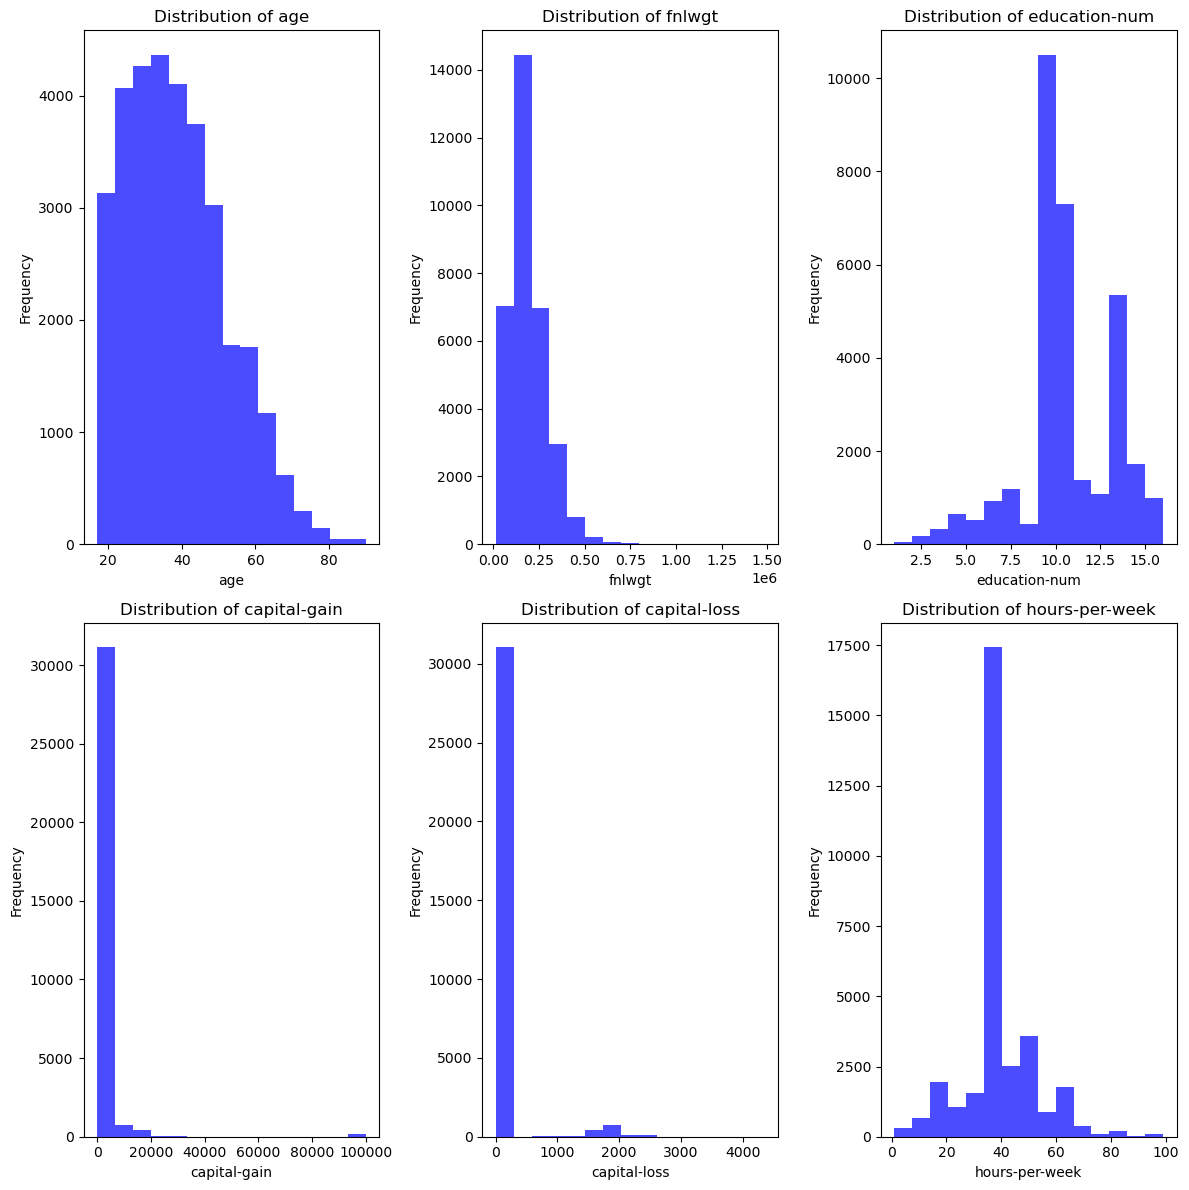

C:\Users\ramosv\AppData\Local\Temp\ipykernel_21432\636798468.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(counts.index.astype(str), rotation=90)
C:\Users\ramosv\AppData\Local\Temp\ipykernel_21432\636798468.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(counts.index.astype(str), rotation=90)
C:\Users\ramosv\AppData\Local\Temp\ipykernel_21432\636798468.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(counts.index.astype(str), rotation=90)
C:\Users\ramosv\AppData\Local\Temp\ipykernel_21432\636798468.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(counts.index.astype(str), rotation=90)
C:\Users\ramosv\AppData\Local\Temp\ipykernel_21432\636798468.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(counts.index.a

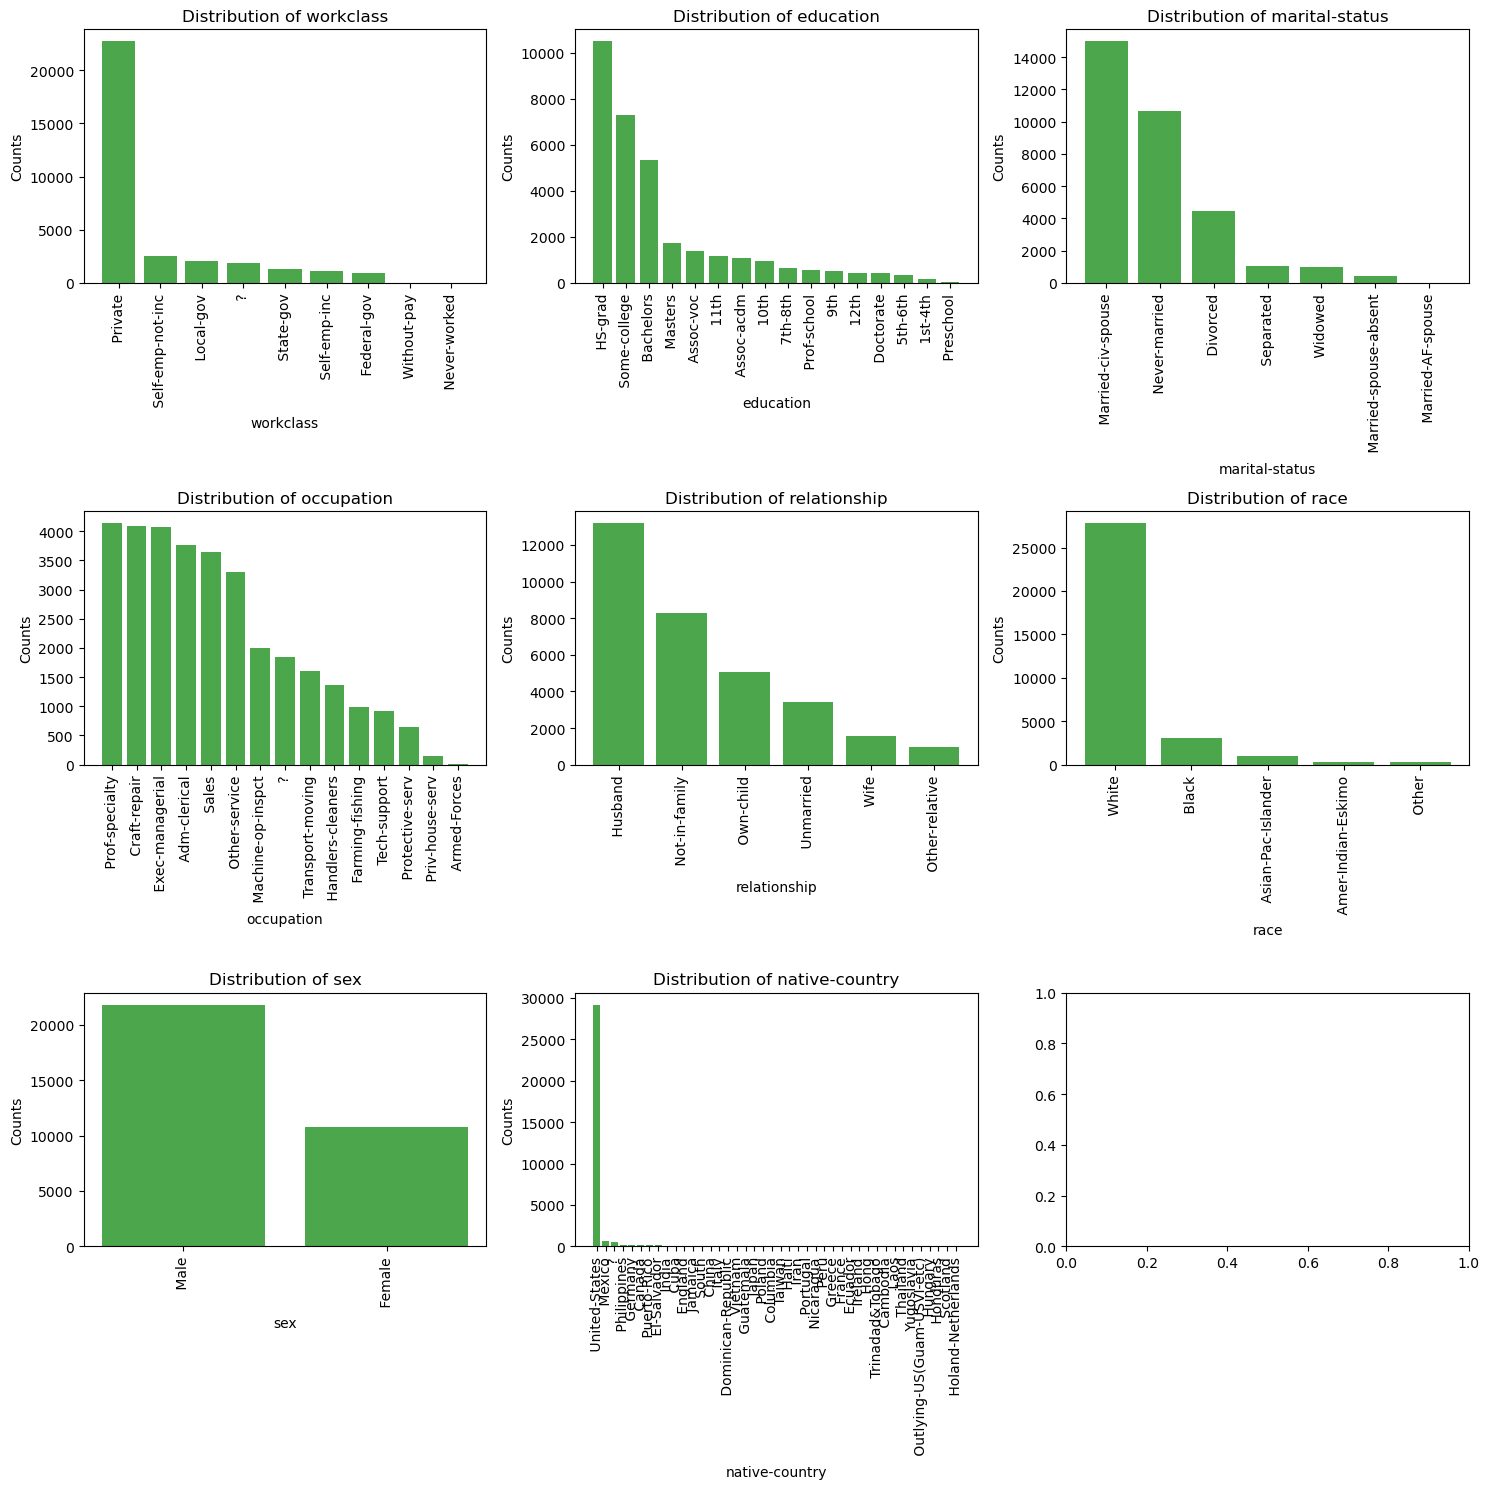

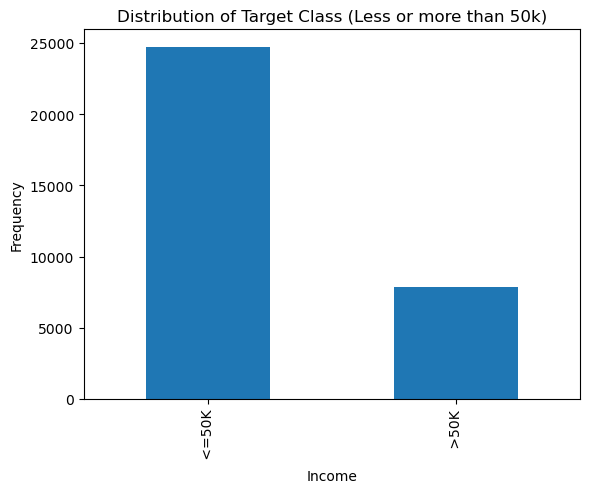

In [116]:
adult_data = pd.read_csv("C:/Users/ramosv/Desktop/Bias in AI/Semester Project/adult/adult.data")
adult_test = pd.read_csv("C:/Users/ramosv/Desktop/Bias in AI/Semester Project/adult/adult.test")

# columns_names = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]

# adult_data.columns = columns_names
# adult_test.columns = columns_names

# adult_data_combined = adult_data.append(adult_test, ignore_index=True)

columns_names = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]

categorical_variables = ["workclass","education","marital-status","occupation","relationship","race","sex","native-country"]
numerical_variables = ["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]
target = "income"

adult_data.columns = columns_names

# Exploring some basic statistics about the dataset
print(adult_data.head())
print(adult_data.info())
print(adult_data.isnull().sum())

# Lets explore the distribution of the numerical variables
figures, axes = plt.subplots(2,3, figsize=(12,12))

for axis, var in zip(axes.flatten(), numerical_variables):
    axis.hist(adult_data[var], bins=15, color="blue", alpha=0.7)
    axis.set_title(f"Distribution of {var}")
    axis.set_xlabel(var)
    axis.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Now for the categorical variables
figures, axes = plt.subplots(3,3, figsize=(15,15))

for column in categorical_variables:
    adult_data[column] = adult_data[f"{column}"].astype("category")

for axis, var in zip(axes.flatten(), categorical_variables):
    counts = adult_data[var].value_counts().sort_values(ascending=False)
    bars = axis.bar(counts.index.astype(str), counts.values, color='green', alpha=0.7)
    axis.set_title(f'Distribution of {var}')
    axis.set_xlabel(var)
    axis.set_ylabel('Counts')
    axis.set_xticklabels(counts.index.astype(str), rotation=90)

plt.tight_layout()
plt.show()

#Lastly we will analize the distrubtion of the target class. This is the class that the model will try to predict.

adult_data['income'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Class (Less or more than 50k)')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


Lets review our findings:

Here is dominating value for each feature in our dateset:

age = Between 30 and 40 years old
"workclass" = Private
"fnlwgt" = Between 0.0 and 0.2
"education" = High school graduate
"education-num" = 9 which represents high school graduates
"marital-status" = Married Civil Spouse
"occupation" = Prof-Speciality
"relationship" = Husband
"race" = White
"sex" = Male
"capital-gain" = 0
"capital-loss" = 0
"hours-per-week" = 40
"native-country" = United States
"income" = <=50k

By looking at the dominating values for each feature as well as the distrubution of these values. We can begin to look at certain features that the model could use for Bias.

The education and education-num can be commbined into a single feature since they refer to the same thing.

Additonaly findings:
Age, Education and Workclass

Here are the next steps in this assignment:

- I will begin by constructing a random forest model to use as a baseline.
- Next, I will investigate the original dataset for any Bias using Statistical Parity Difference and Disparitive Impact
- Next, I will attempt to mitigate this bias and re-train the model.
- Lastly, I will compare the two models pre/post bias too see which model performed best.

In [131]:
#I will first load the data into a dataframe again. (I am doing this again since I had to modify the data for the plots)
#The data was previously split in the following way:
#45222 if instances with unknown values are removed (train=30162, test=15060)

adult_income_data = pd.read_csv("C:/Users/ramosv/Desktop/Bias in AI/Semester Project/adult/adult.data")
adult_income_test = pd.read_csv("C:/Users/ramosv/Desktop/Bias in AI/Semester Project/adult/adult.test")

columns_names = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]

adult_income_data.columns = columns_names
adult_income_test.columns = columns_names

#By looking at the data I found a few instnces of the value "?"
#We will replace by a nan and then drop those

adult_income_data.replace(' ?', pd.NA, inplace=True)
adult_income_test.replace(' ?', pd.NA, inplace=True)

adult_income_data.dropna(inplace=True)
adult_income_test.dropna(inplace=True)


#39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
#25, Private, 226802, 11th, 7, Never-married, Machine-op-inspct, Own-child, Black, Male, 0, 0, 40, United-States, <=50K.

# Ive decicded to drop the fnlwgt, capital-gain and capital-loss column since it does not provide any valuable information in my opinion
adult_income_data.drop(["fnlwgt","capital-gain","capital-loss"], axis=1, inplace=True)
adult_income_test.drop(["fnlwgt","capital-gain","capital-loss"], axis=1, inplace=True)

# I was able to find why my model was performing so poorly at first
# The test dataset provided added a period (".") at the end of the target variable
#print(adult_income_data['income'].unique())
#print(adult_income_test['income'].unique())

#OUTPUT for line above
# [' <=50K' ' >50K']
# [' <=50K.' ' >50K.']

#print(adult_income_data)
#print(adult_income_test)

adult_income_data['income'] = adult_income_data['income'].str.strip().replace("\\.", "", regex=True)
adult_income_test['income'] = adult_income_test['income'].str.strip().replace("\\.", "", regex=True)

label_encoder = LabelEncoder()
adult_income_data['target_binary'] = label_encoder.fit_transform(adult_income_data['income'])
adult_income_test['target_binary'] = label_encoder.transform(adult_income_test['income'])

#print(adult_income_data)
#print(adult_income_test)

categorical_variables = ["workclass","education","marital-status","occupation","relationship","race","sex","native-country"]
numerical_variables = ["age","education-num","hours-per-week"]
# I will be using ColumnTransformer and Pipeline from skcit learn. I became more comfortable working with these components during assignemtn 1
process = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_variables), ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_variables)])

# Now we pass the ColumnTransformer variable to the Pipeline
model = Pipeline(steps=[('preprocessor', process),('classifier', RandomForestClassifier(random_state=42))])

# Seetting up our features and target varaibles manually since the data was already split
X_train = adult_income_data.drop(["income","target_binary"], axis=1)
X_test = adult_income_test.drop(["income","target_binary"], axis=1)
y_train = adult_income_data["target_binary"]
y_test = adult_income_test["target_binary"]

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     11359
           1       0.63      0.55      0.59      3700

    accuracy                           0.81     15059
   macro avg       0.74      0.72      0.73     15059
weighted avg       0.80      0.81      0.81     15059



Figuring out feature importance.

In [114]:
import numpy as np

#I resused a lot of the code for figure out features importance from assignemnt 1
#I left some of the comments that I wrote for myself since they help me better understand the code

# Creating a variable for the model we built ealier.
# Since we used the pipeline function it needs to be accesed using the named_steps property
rf_classifier = model.named_steps['classifier']

# Using the feature_importances_ attribute of our model: RandomForestClassifier. Documentation for this is highlated above
importances = rf_classifier.feature_importances_
#print(importances)

# Again using the named_steps property to access the preprocessor.
preprocessor = model.named_steps['preprocessor']

# Now we can use the preprocessor to get column/feature names from categorical features. These need to be accesed through the preprocessor
# We use .named_transformers_['cat'] to pull the categories from our transformer "onehotencoder" used earlier
category_features = preprocessor.named_transformers_['cat'].get_feature_names_out()
#print(category_features)

#Geting all of the features names in sinve variable called
feature_names = np.concatenate([numerical_variables, category_features])
#print(feature_names)

# Now we combine both the names and the importances.
feature_importances = np.array([feature_names, importances])
#print(feature_importances)

# Sorting the features by their importance
# Sort in decensing order.
sorted_indices = np.argsort(importances)[::-1]
sorted_features = []

# Now we will combine the feature along with the level of importance
for idx in sorted_indices:
    feature = feature_names[idx]
    num = importances[idx]
    sorted_features.append((feature, float(num)))

#Printing the featues and their importance!
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")



age: 0.2823
hours-per-week: 0.1391
education-num: 0.0787
marital-status_ Married-civ-spouse: 0.0758
relationship_ Husband: 0.0534
marital-status_ Never-married: 0.0268
occupation_ Exec-managerial: 0.0226
occupation_ Prof-specialty: 0.0188
workclass_ Private: 0.0131
education_ Bachelors: 0.0127
sex_ Female: 0.0115
relationship_ Wife: 0.0114
relationship_ Not-in-family: 0.0111
workclass_ Self-emp-not-inc: 0.0104
education_ Masters: 0.0095
sex_ Male: 0.0095
occupation_ Other-service: 0.0094
occupation_ Sales: 0.0087
occupation_ Craft-repair: 0.0087
relationship_ Own-child: 0.0082
education_ HS-grad: 0.0082
race_ White: 0.0079
workclass_ Self-emp-inc: 0.0078
marital-status_ Divorced: 0.0075
workclass_ Local-gov: 0.0075
occupation_ Adm-clerical: 0.0072
native-country_ United-States: 0.0070
education_ Some-college: 0.0066
race_ Black: 0.0064
education_ Prof-school: 0.0062
workclass_ Federal-gov: 0.0062
workclass_ State-gov: 0.0061
occupation_ Farming-fishing: 0.0059
occupation_ Tech-support:

From figuring out Feature importance I seems that age is the biggest contributor for idendifying the target class.

I few other points that I noticed from the model perfoamnce results

The model does farely well at predicting when an individual makes less than 50k a year. But it struggles more with predicting for people when they make more than 50k a year.

Thi due to the fact that our target class is heavily imbalanced.

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     11359
           1       0.63      0.55      0.59      3700

    accuracy                           0.81     15059
   macro avg       0.74      0.72      0.73     15059
weighted avg       0.80      0.81      0.81     15059


I have a suspiccion that the model is predicting older individuals to be more likely to have larger income

In [137]:
#import from aif360
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric

#Lets merge the two data sets first:
adult_data_combined = adult_income_data.append(adult_income_test, ignore_index=True)

#Well have to drop the income column since LabelEncoder() wont be able to turn <=50 and >50 to numbers
#This is okay since we already have ["target_binary"] column which represents the same data

adult_data_combined.drop(columns=['income'], inplace=True)

#I will need to encode all of my categorical data since the StandardDateset expect that
encoder = LabelEncoder()
for column in categorical_variables:
    adult_data_combined[column] = encoder.fit_transform(adult_data_combined[column])


#Lets now set Caucasian(1) to be the prigileged attribute and every other ethnicity as unpriviliged(0).
def categorize_age(row):
    if row['age'] >= 40:
        return 1
    else:
        return 0

# Createing a new column and use the function above to apply this categorization to
adult_data_combined['Age_Binary'] = adult_data_combined.apply(categorize_age, axis=1)


# 0 being <=50k and 1 being >50k
dataset = StandardDataset(adult_data_combined,
                          label_name='target_binary',
                          favorable_classes=[1],
                          protected_attribute_names=['Age_Binary'],
                          privileged_classes=[[1]])

metric = BinaryLabelDatasetMetric(dataset,
                                  unprivileged_groups=[{'Age_Binary': 0}],
                                  privileged_groups=[{'Age_Binary': 1}])

# Calculating the Statistical Parity Difference for Age
spd = metric.statistical_parity_difference()
print("Statistical Parity Difference (SPD):", spd)

# Calculating and the Disparate Impact for Age
di = metric.disparate_impact()
print("Disparate Impact (DI):", di)




C:\Users\ramosv\AppData\Local\Temp\ipykernel_21432\1690961616.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  adult_data_combined = adult_income_data.append(adult_income_test, ignore_index=True)


Statistical Parity Difference (SPD): -0.19850036772441879
Disparate Impact (DI): 0.44764993870813674
